** INVESTIGATING THE EFFECTS OF COVID-19 FACTORS ON ELECTIONS.**

Load in CSV files:

In [1]:
#importing CSV files
presidenturl = 'https://raw.githubusercontent.com/victoriamidkiff/cs216-project/main/1976-2020-president.csv?token=GHSAT0AAAAAACBKNKCTIWR67ZEXEDA3LWCUZCHFTRQ'
covidurl = 'https://raw.githubusercontent.com/victoriamidkiff/cs216-project/main/COVID19_state.csv?token=GHSAT0AAAAAACBKNKCSKHDX4YX2A7JZHLK4ZCHFUKQ'
maskurl = 'https://raw.githubusercontent.com/victoriamidkiff/cs216-project/main/mask-use-by-county.csv?token=GHSAT0AAAAAACBKNKCSLG7546CENRIYKC3MZCHFUYQ'
countiesurl = 'https://raw.githubusercontent.com/victoriamidkiff/cs216-project/main/us-counties-recent.csv?token=GHSAT0AAAAAACBKNKCTOQNP7OW5QQOTX2OKZCHFVJQ'

Import packages: 

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline


if ('0.11' in sns.__version__) or ('0.12' in sns.__version__):
    sns.set_theme()
else:
    sns.set()

election_data = pd.read_csv(presidenturl)
covid_data = pd.read_csv(covidurl)
mask_use = pd.read_csv(maskurl)
us_counties_recent = pd.read_csv(countiesurl)


Data cleaning:

In [3]:
sixteen_data = election_data[election_data["year"] == 2016].sort_values(by = "candidatevotes", ascending = False).groupby("state").head(1)[["state","party_detailed","candidatevotes", "totalvotes", "year"]]
twenty_data = election_data[election_data["year"] == 2020].sort_values(by = "candidatevotes", ascending = False).groupby("state").head(1)[["state","party_detailed","candidatevotes", "totalvotes", "year"]]

election = sixteen_data.merge(twenty_data, on="state")

election['columns_equal'] = election['party_detailed_x'].eq(election['party_detailed_y'])
election.head()

,state,party_detailed_x,candidatevotes_x,totalvotes_x,year_x,party_detailed_y,candidatevotes_y,totalvotes_y,year_y,columns_equal
0,CALIFORNIA,DEMOCRAT,8753788,14181595,2016,DEMOCRAT,11110250,17500881,2020,True
1,TEXAS,REPUBLICAN,4685047,8969226,2016,REPUBLICAN,5890347,11315056,2020,True
2,FLORIDA,REPUBLICAN,4617886,9420039,2016,REPUBLICAN,5668731,11067456,2020,True
3,NEW YORK,DEMOCRAT,4379789,7802084,2016,DEMOCRAT,5230985,8661735,2020,True
4,ILLINOIS,DEMOCRAT,3090729,5536424,2016,DEMOCRAT,3471915,6033743,2020,True


Question 1 Data wrangling: 

In [4]:
covid_data["deaths_per_capita"] = covid_data["Deaths"] / covid_data["Population"] * 100
covid_data["state"] = covid_data["State"].str.upper()
election_states = election.merge(covid_data, on="state")
election_states.head()


,state,party_detailed_x,candidatevotes_x,totalvotes_x,year_x,party_detailed_y,candidatevotes_y,totalvotes_y,year_y,columns_equal,...,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date,deaths_per_capita
0,CALIFORNIA,DEMOCRAT,8753788,14181595,2016,DEMOCRAT,11110250,17500881,2020,True,...,7549,12.8,9.0,59.4,95.0,0.33,0.40,0.26,03/19/20,0.044249
1,TEXAS,REPUBLICAN,4685047,8969226,2016,REPUBLICAN,5890347,11315056,2020,True,...,6998,8.3,6.0,64.8,84.7,0.36,0.39,0.24,03/23/20,0.061403
2,FLORIDA,REPUBLICAN,4617886,9420039,2016,REPUBLICAN,5668731,11067456,2020,True,...,8076,7.4,7.0,70.7,91.2,0.29,0.37,0.35,03/16/20,0.077493
3,NEW YORK,DEMOCRAT,4379789,7802084,2016,DEMOCRAT,5230985,8661735,2020,True,...,9778,6.6,3.0,45.4,87.9,0.31,0.39,0.30,03/18/20,0.132908
4,ILLINOIS,DEMOCRAT,3090729,5536424,2016,DEMOCRAT,3471915,6033743,2020,True,...,8262,9.3,2.0,51.8,88.5,0.33,0.38,0.28,03/17/20,0.079726


In [5]:
sixteen_data = election_data[election_data["year"] == 2016].sort_values(by = "candidatevotes", ascending = False).groupby("state").head(1)[["state","party_detailed","candidatevotes", "totalvotes", "year"]]
twenty_data = election_data[election_data["year"] == 2020].sort_values(by = "candidatevotes", ascending = False).groupby("state").head(1)[["state","party_detailed","candidatevotes", "totalvotes", "year"]]
combined_elections = sixteen_data.merge(twenty_data, on="state")

combined_elections["percent_votes_x"] = np.where(
    combined_elections['party_detailed_x'] == "DEMOCRAT", combined_elections["candidatevotes_x"] / combined_elections["totalvotes_x"], 
    (combined_elections["totalvotes_x"] - combined_elections["candidatevotes_x"]) / combined_elections["totalvotes_x"])

combined_elections["percent_votes_y"] = np.where(
    combined_elections['party_detailed_y'] == "DEMOCRAT", combined_elections["candidatevotes_y"] / combined_elections["totalvotes_y"], 
    (combined_elections["totalvotes_y"] - combined_elections["candidatevotes_y"]) / combined_elections["totalvotes_y"])

combined_elections["percent_increase_dem"] = combined_elections["percent_votes_y"] - combined_elections["percent_votes_x"]
combined_elections["Party"] = np.where((combined_elections['party_detailed_x'] == combined_elections['party_detailed_y']), combined_elections['party_detailed_y'], 'FLIPPED')


covid_data["State"] = covid_data["State"].str.upper()
covid_data = covid_data[["State", "Deaths", "Population"]]
covid_data["deaths_per_pop"] = covid_data["Deaths"] / covid_data["Population"]
deaths_elec = covid_data.merge(combined_elections, left_on = "State", right_on = "state")
deaths_elec.head()

<ipython-input-5-fe76f55c982e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data["deaths_per_pop"] = covid_data["Deaths"] / covid_data["Population"]


,State,Deaths,Population,deaths_per_pop,state,party_detailed_x,candidatevotes_x,totalvotes_x,year_x,party_detailed_y,candidatevotes_y,totalvotes_y,year_y,percent_votes_x,percent_votes_y,percent_increase_dem,Party
0,ALASKA,84,734002,0.000114,ALASKA,REPUBLICAN,163387,318608,2016,REPUBLICAN,189951,359530,2020,0.487185,0.471669,-0.015516,REPUBLICAN
1,ALABAMA,2973,4908621,0.000606,ALABAMA,REPUBLICAN,1318255,2123372,2016,REPUBLICAN,1441170,2323282,2020,0.379169,0.379684,0.000514,REPUBLICAN
2,ARKANSAS,1985,3038999,0.000653,ARKANSAS,REPUBLICAN,684872,1130635,2016,REPUBLICAN,760647,1219069,2020,0.394259,0.376043,-0.018216,REPUBLICAN
3,ARIZONA,5982,7378494,0.000811,ARIZONA,REPUBLICAN,1252401,2573165,2016,DEMOCRAT,1672143,3387326,2020,0.513284,0.493647,-0.019637,FLIPPED
4,CALIFORNIA,17672,39937489,0.000442,CALIFORNIA,DEMOCRAT,8753788,14181595,2016,DEMOCRAT,11110250,17500881,2020,0.617264,0.634839,0.017575,DEMOCRAT


Question 1 Visualizations:

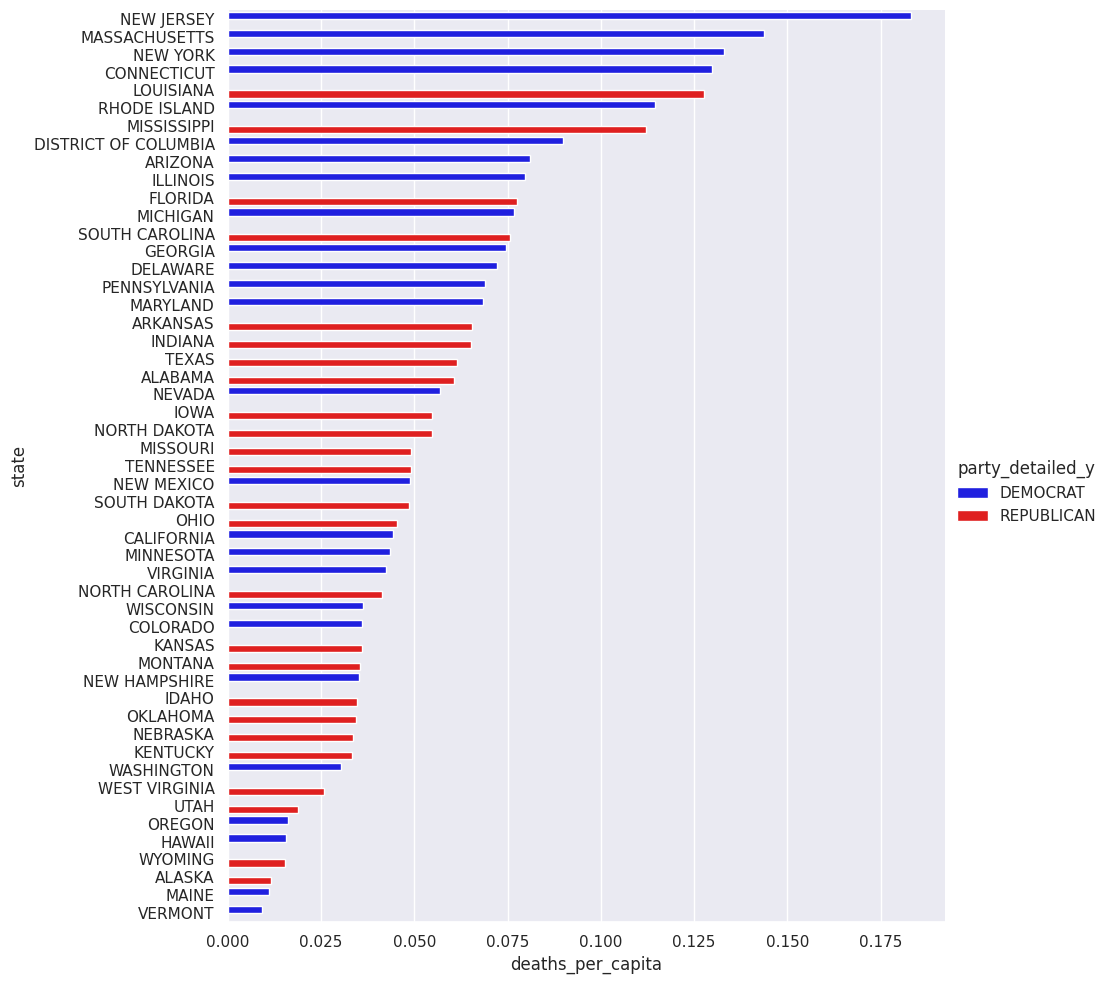

In [6]:
#deaths-graph

deaths_election_states = election_states.sort_values("deaths_per_capita", ascending = False)

sns.catplot(data= deaths_election_states, y = "state", x = "deaths_per_capita", height = 10, kind = "bar", hue = "party_detailed_y", palette=["blue", "red"])

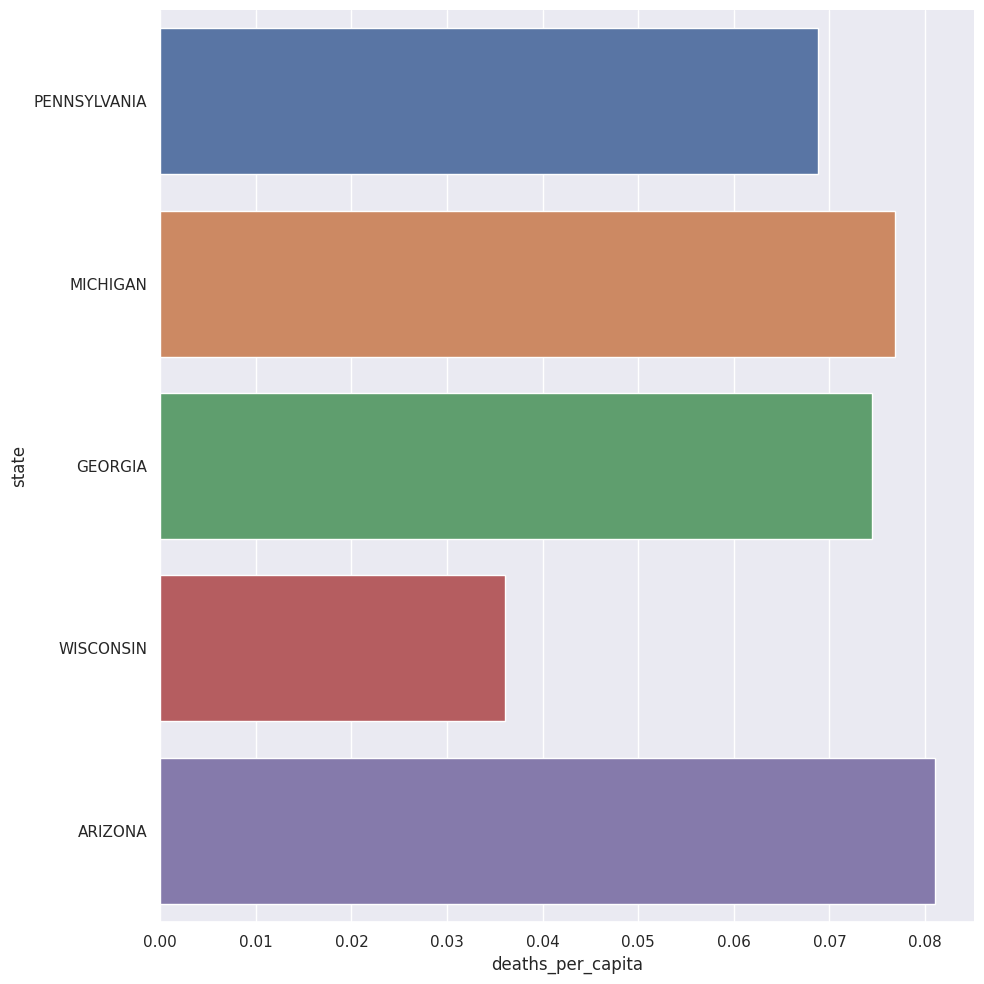

In [7]:
#swing-deaths-graph

swing = election_states[election_states["columns_equal"] == False] 
sns.catplot(data=swing, y = "state", x = "deaths_per_capita", height = 10, kind = "bar")

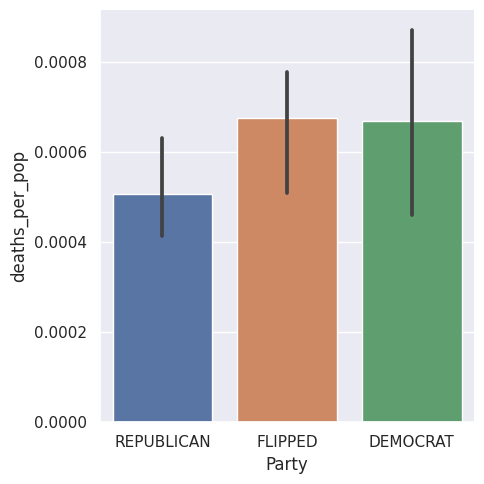

In [8]:
#party-vs-percent-died

sns.catplot(data = deaths_elec, x = 'Party', y = 'deaths_per_pop', kind = 'bar')

Question 1 Hypothesis testing:

In [9]:
demo_death = deaths_elec[deaths_elec['party_detailed_y']=='DEMOCRAT']['deaths_per_pop']
rep_death = deaths_elec[deaths_elec['party_detailed_y']=='REPUBLICAN']['deaths_per_pop']

print("p-value: ", stats.ttest_ind(demo_death, rep_death, equal_var= False).pvalue)

#CI for democratic and republican
demo_death_avg = np.mean(demo_death)
sigma = np.std(demo_death)
n=len(demo_death)
ci_demo_death = stats.norm.interval(0.95, loc= demo_death_avg, scale=sigma/(np.sqrt(n)))
print("95% Confidence Interval for Democratic States: ", ci_demo_death)

rep_death_avg = np.mean(rep_death)
sigma2 = np.std(rep_death)
n2=len(rep_death)
ci_rep_death = stats.norm.interval(0.95, loc= rep_death_avg, scale=sigma2/(np.sqrt(n2)))
print("95% Confidence Interval for Republican States: ", ci_rep_death)

p-value:  0.11961855253456627
95% Confidence Interval for Democratic States:  (0.0005025794870581123, 0.0008364834377285243)
95% Confidence Interval for Republican States:  (0.000401809451767426, 0.0006113011664685957)


Question 2 Data wrangling:

In [10]:
deaths_mask_by_county = us_counties_recent.merge(mask_use, how = "left", left_on = "fips", right_on = "COUNTYFP")

all_states = deaths_mask_by_county.groupby("state").agg({"cases": "sum", "deaths": "sum", "NEVER": "mean", "RARELY": "mean", "SOMETIMES": "mean", "FREQUENTLY": "mean", "ALWAYS": "mean"})
all_states = all_states.reset_index()

all_states["state"] = all_states["state"].str.upper()

election_states = election.merge(all_states, on="state")
election_states["Party"] = election_states["party_detailed_y"]

election_states.head()

,state,party_detailed_x,candidatevotes_x,totalvotes_x,year_x,party_detailed_y,candidatevotes_y,totalvotes_y,year_y,columns_equal,cases,deaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,Party
0,CALIFORNIA,DEMOCRAT,8753788,14181595,2016,DEMOCRAT,11110250,17500881,2020,True,363627975,3113790.0,0.032310,0.030724,0.063690,0.158603,0.714638,DEMOCRAT
1,TEXAS,REPUBLICAN,4685047,8969226,2016,REPUBLICAN,5890347,11315056,2020,True,250993695,2827300.0,0.051890,0.059677,0.097193,0.188665,0.602559,REPUBLICAN
2,FLORIDA,REPUBLICAN,4617886,9420039,2016,REPUBLICAN,5668731,11067456,2020,True,225495192,2602533.0,0.055254,0.057522,0.110343,0.194299,0.582552,REPUBLICAN
3,NEW YORK,DEMOCRAT,4379789,7802084,2016,DEMOCRAT,5230985,8661735,2020,True,203624148,2392427.0,0.022158,0.022649,0.048842,0.134649,0.771579,DEMOCRAT
4,ILLINOIS,DEMOCRAT,3090729,5536424,2016,DEMOCRAT,3471915,6033743,2020,True,122541831,1244190.0,0.072275,0.071314,0.126873,0.219490,0.510078,DEMOCRAT


Question 2 Visualizations: 

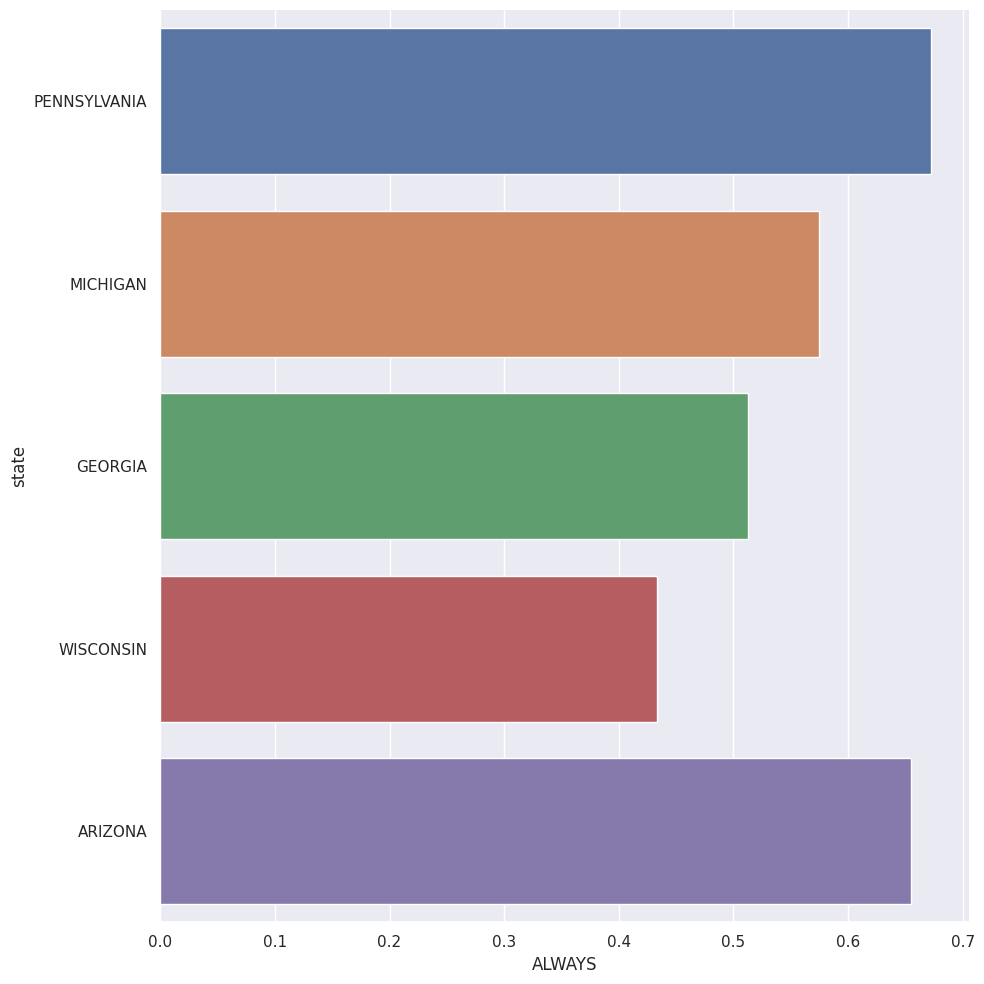

In [11]:
#swing-mask-graph

swing = election_states[election_states["columns_equal"] == False] 
sns.catplot(data=swing, y = "state", x = "ALWAYS", height = 10, kind = "bar")

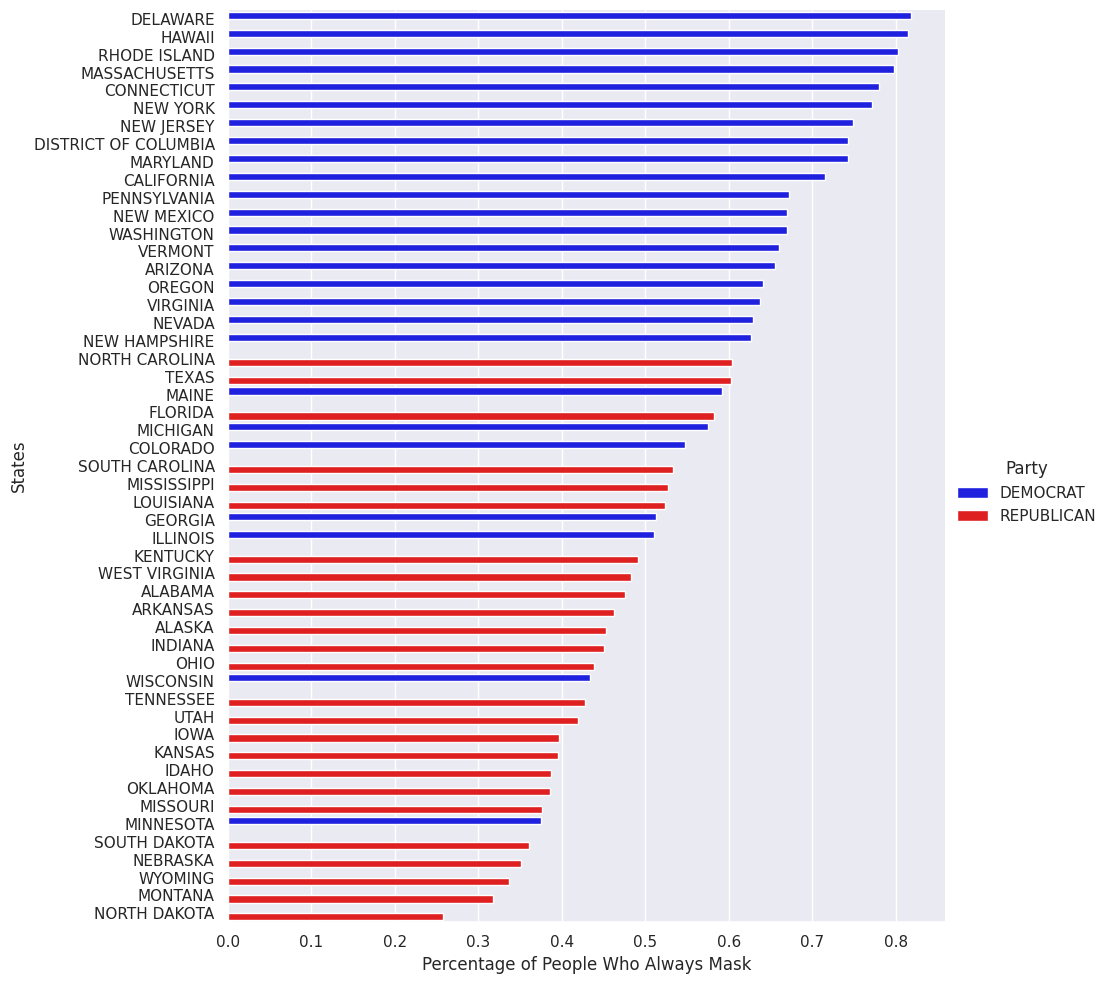

In [12]:
#always-graph

always_election_states = election_states.sort_values("ALWAYS", ascending = False)
always_graph = sns.catplot(data = always_election_states, y = "state", x = "ALWAYS", height = 10, kind = "bar", hue = "Party", palette=["blue", "red"])
always_graph.set(xlabel='Percentage of People Who Always Mask',
       ylabel='States')
always_graph.savefig("always_graph.png")

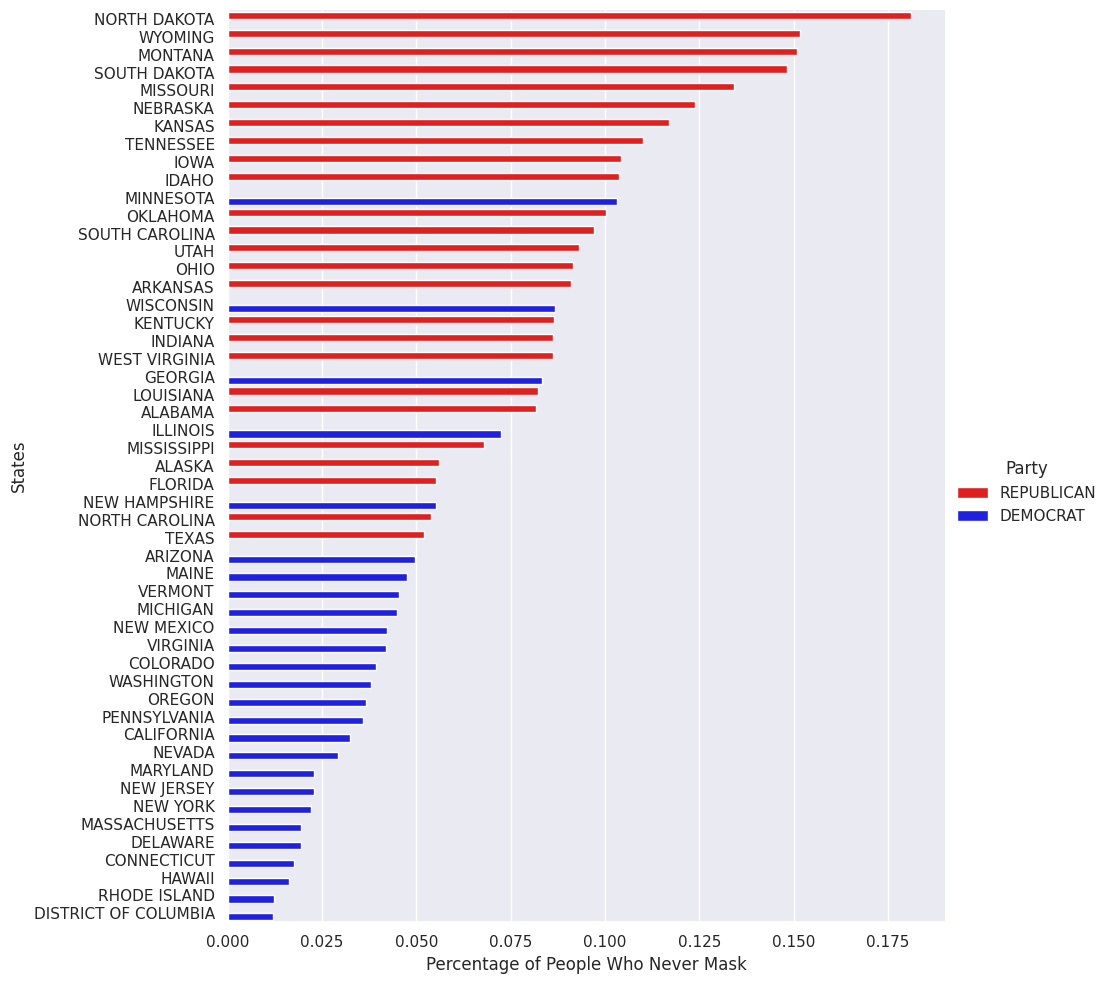

In [13]:
#never-graph

never_election_states = election_states.sort_values("NEVER", ascending = False)
never_graph = sns.catplot(data= never_election_states, y = "state", x = "NEVER", height = 10, kind = "bar", hue = "Party", palette=["red", "blue"])
never_graph.set(xlabel='Percentage of People Who Never Mask',
       ylabel='States')
never_graph.savefig("never_graph.png")


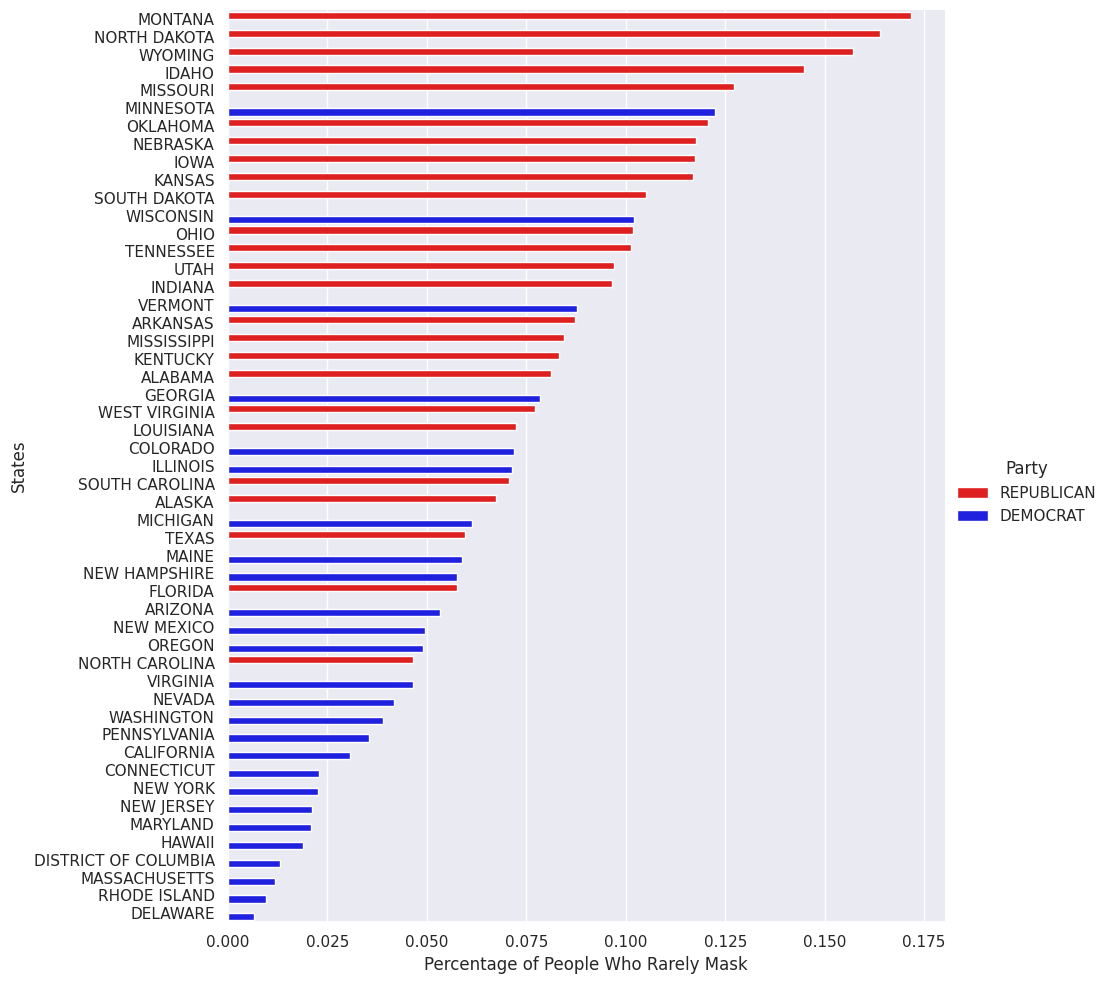

In [14]:
#rarely-graph

rarely_election_states = election_states.sort_values("RARELY", ascending = False)
rarely_graph = sns.catplot(data= rarely_election_states, y = "state", x = "RARELY", height = 10, kind = "bar", hue = "Party", palette=["red", "blue"])
rarely_graph.set(xlabel='Percentage of People Who Rarely Mask',
       ylabel='States')
rarely_graph.savefig("rarely_graph.png")

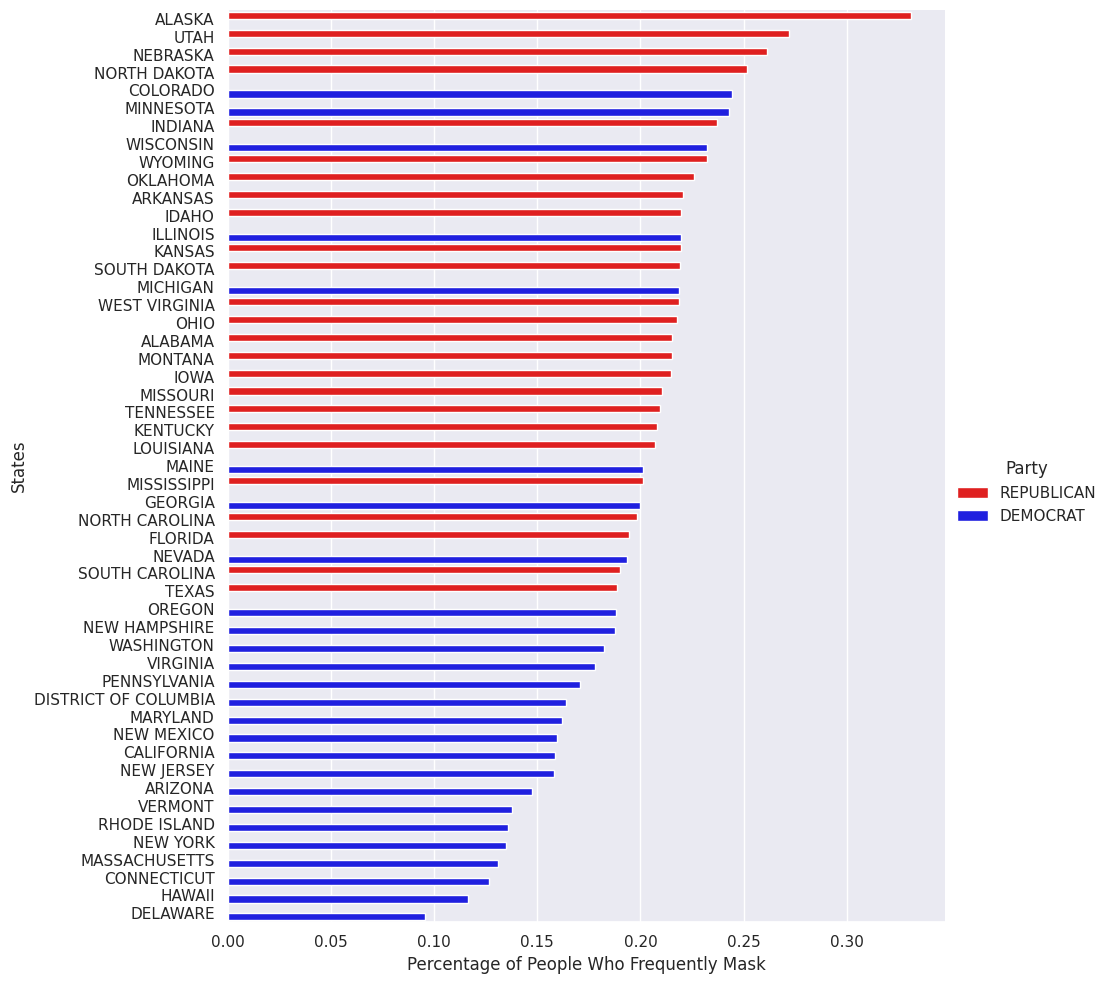

In [15]:
#frequently-graph

frequently_election_states = election_states.sort_values("FREQUENTLY", ascending = False)
frequently_graph = sns.catplot(data= frequently_election_states, y = "state", x = "FREQUENTLY", height = 10, kind = "bar", hue = "Party", palette=["red", "blue"])
frequently_graph.set(xlabel='Percentage of People Who Frequently Mask',
       ylabel='States')
frequently_graph.savefig("frequently_graph_1.png")

Question 2 Hypothesis testing:

In [16]:
#INSERT HYPOTHESIS TESTING HERE

Visualizations for prototype
(unused in final report):

In [17]:
# county data 

deaths_mask_by_county = us_counties_recent.merge(mask_use, how = "left", left_on = "fips", right_on = "COUNTYFP")
deaths_mask_by_county

,date,county,state,fips,cases,deaths,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,2023-02-22,Autauga,Alabama,1001.0,19732,230.0,1001.0,0.053,0.074,0.134,0.295,0.444
1,2023-02-22,Baldwin,Alabama,1003.0,69641,724.0,1003.0,0.083,0.059,0.098,0.323,0.436
2,2023-02-22,Barbour,Alabama,1005.0,7451,112.0,1005.0,0.067,0.121,0.120,0.201,0.491
3,2023-02-22,Bibb,Alabama,1007.0,8067,109.0,1007.0,0.020,0.034,0.096,0.278,0.572
4,2023-02-22,Blount,Alabama,1009.0,18616,261.0,1009.0,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...,...,...,...,...,...,...
97696,2023-03-23,Sweetwater,Wyoming,56037.0,12519,139.0,56037.0,0.061,0.295,0.230,0.146,0.268
97697,2023-03-23,Teton,Wyoming,56039.0,12150,16.0,56039.0,0.095,0.157,0.160,0.247,0.340
97698,2023-03-23,Uinta,Wyoming,56041.0,6416,43.0,56041.0,0.098,0.278,0.154,0.207,0.264
97699,2023-03-23,Washakie,Wyoming,56043.0,2700,51.0,56043.0,0.204,0.155,0.069,0.285,0.287


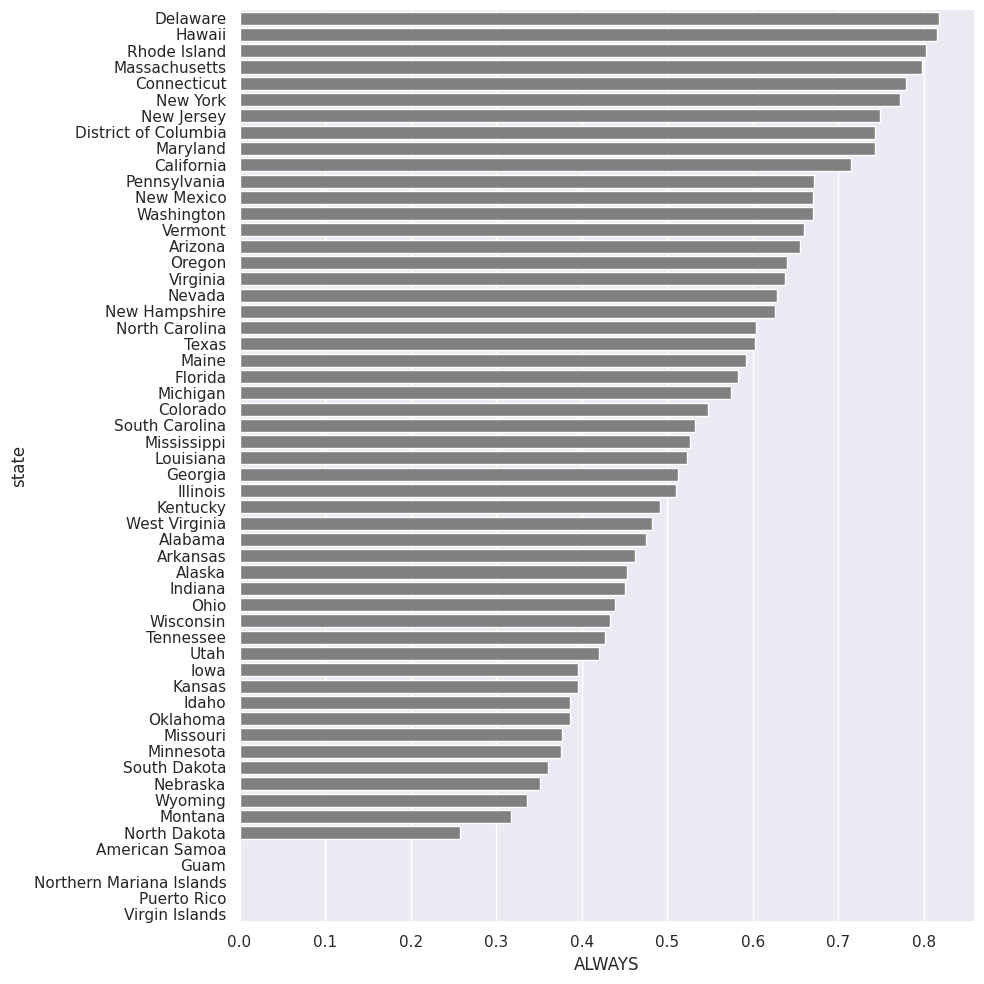

In [18]:
#sns.relplot(data=deaths_mask_by_county, x="state", y="sat_avg")

states_deaths_mask = deaths_mask_by_county.groupby("state").agg({"deaths": "sum", "cases": "sum", "ALWAYS": "mean", "NEVER": "mean", })
states_deaths_mask["state"] = states_deaths_mask.index
states_deaths_mask = states_deaths_mask.sort_values("ALWAYS", ascending = False)

#display(states_deaths_mask)

sns.catplot(data=states_deaths_mask, y = "state", x = "ALWAYS", height = 10, kind = "bar", color = "gray")

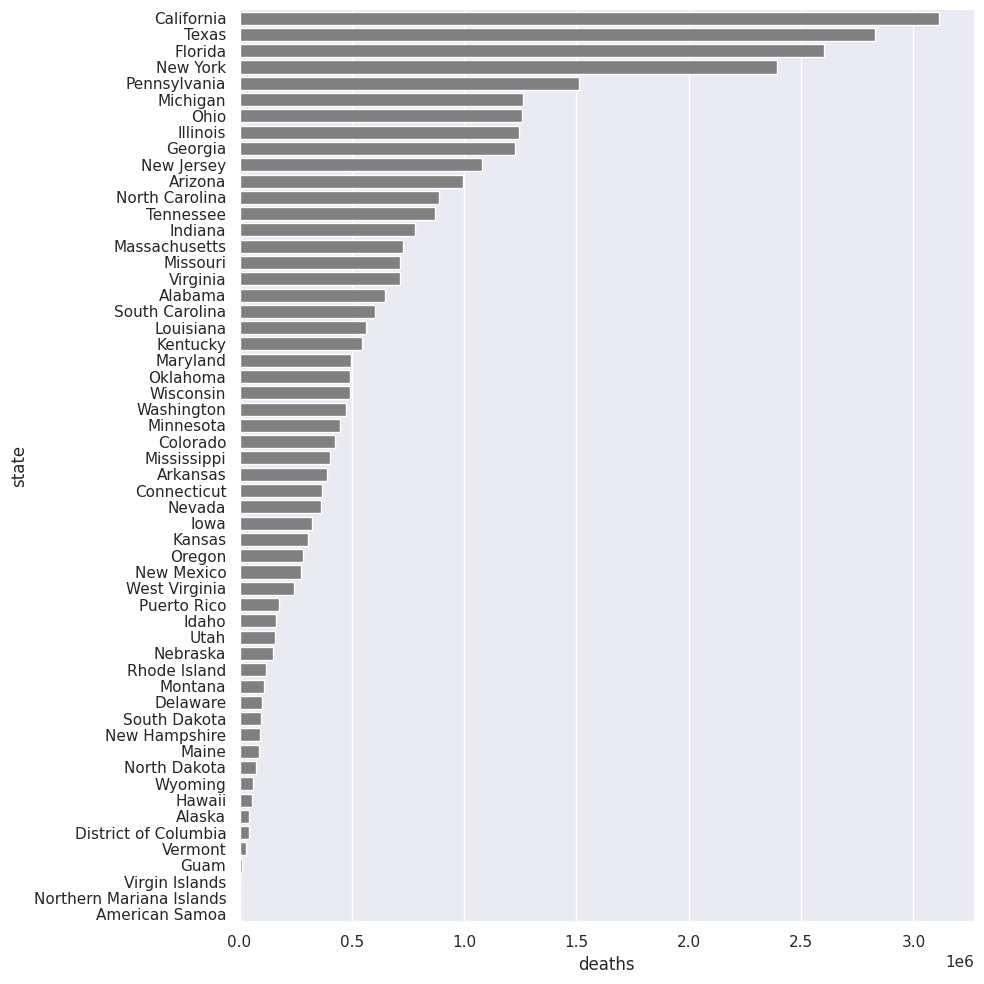

In [19]:
states_deaths_mask = states_deaths_mask.sort_values("deaths", ascending = False)

sns.catplot(data=states_deaths_mask, y = "state", x = "deaths", height = 10, kind = "bar", color = "gray")

([], [])

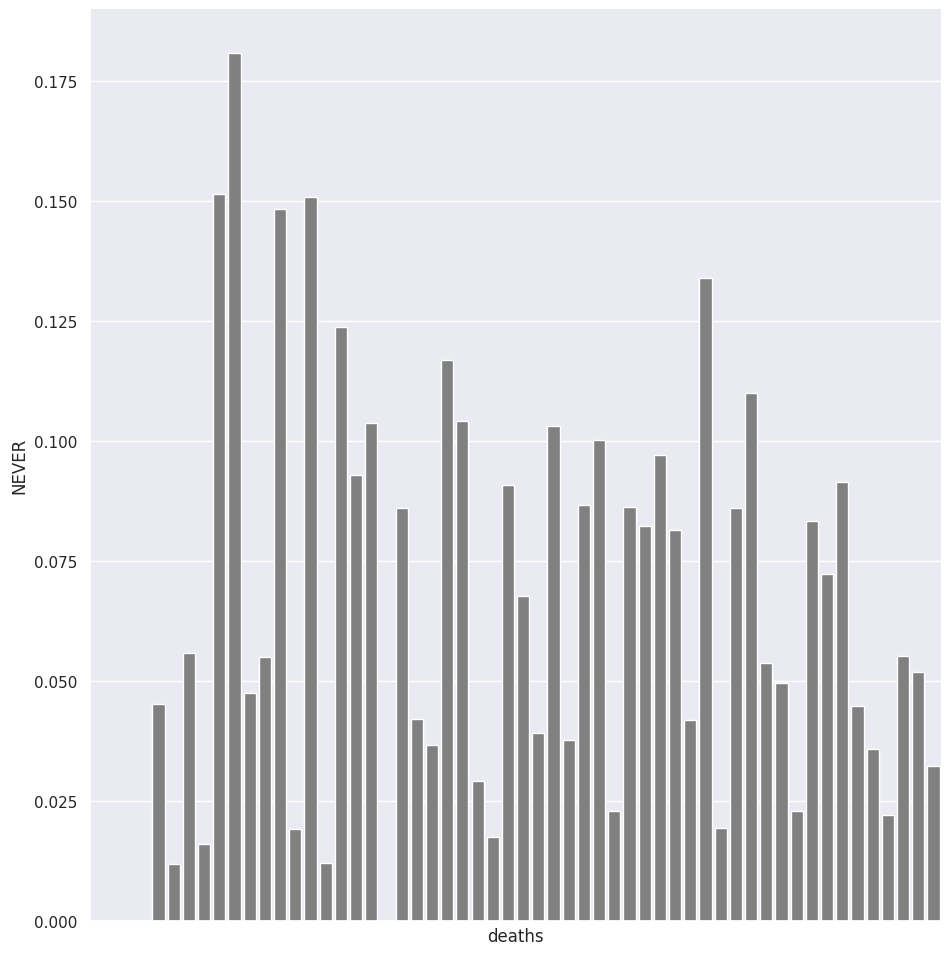

In [20]:
sns.catplot(data=states_deaths_mask, y = "NEVER", x = "deaths", height = 10, kind = "bar", color = "gray")
plt.xticks([])

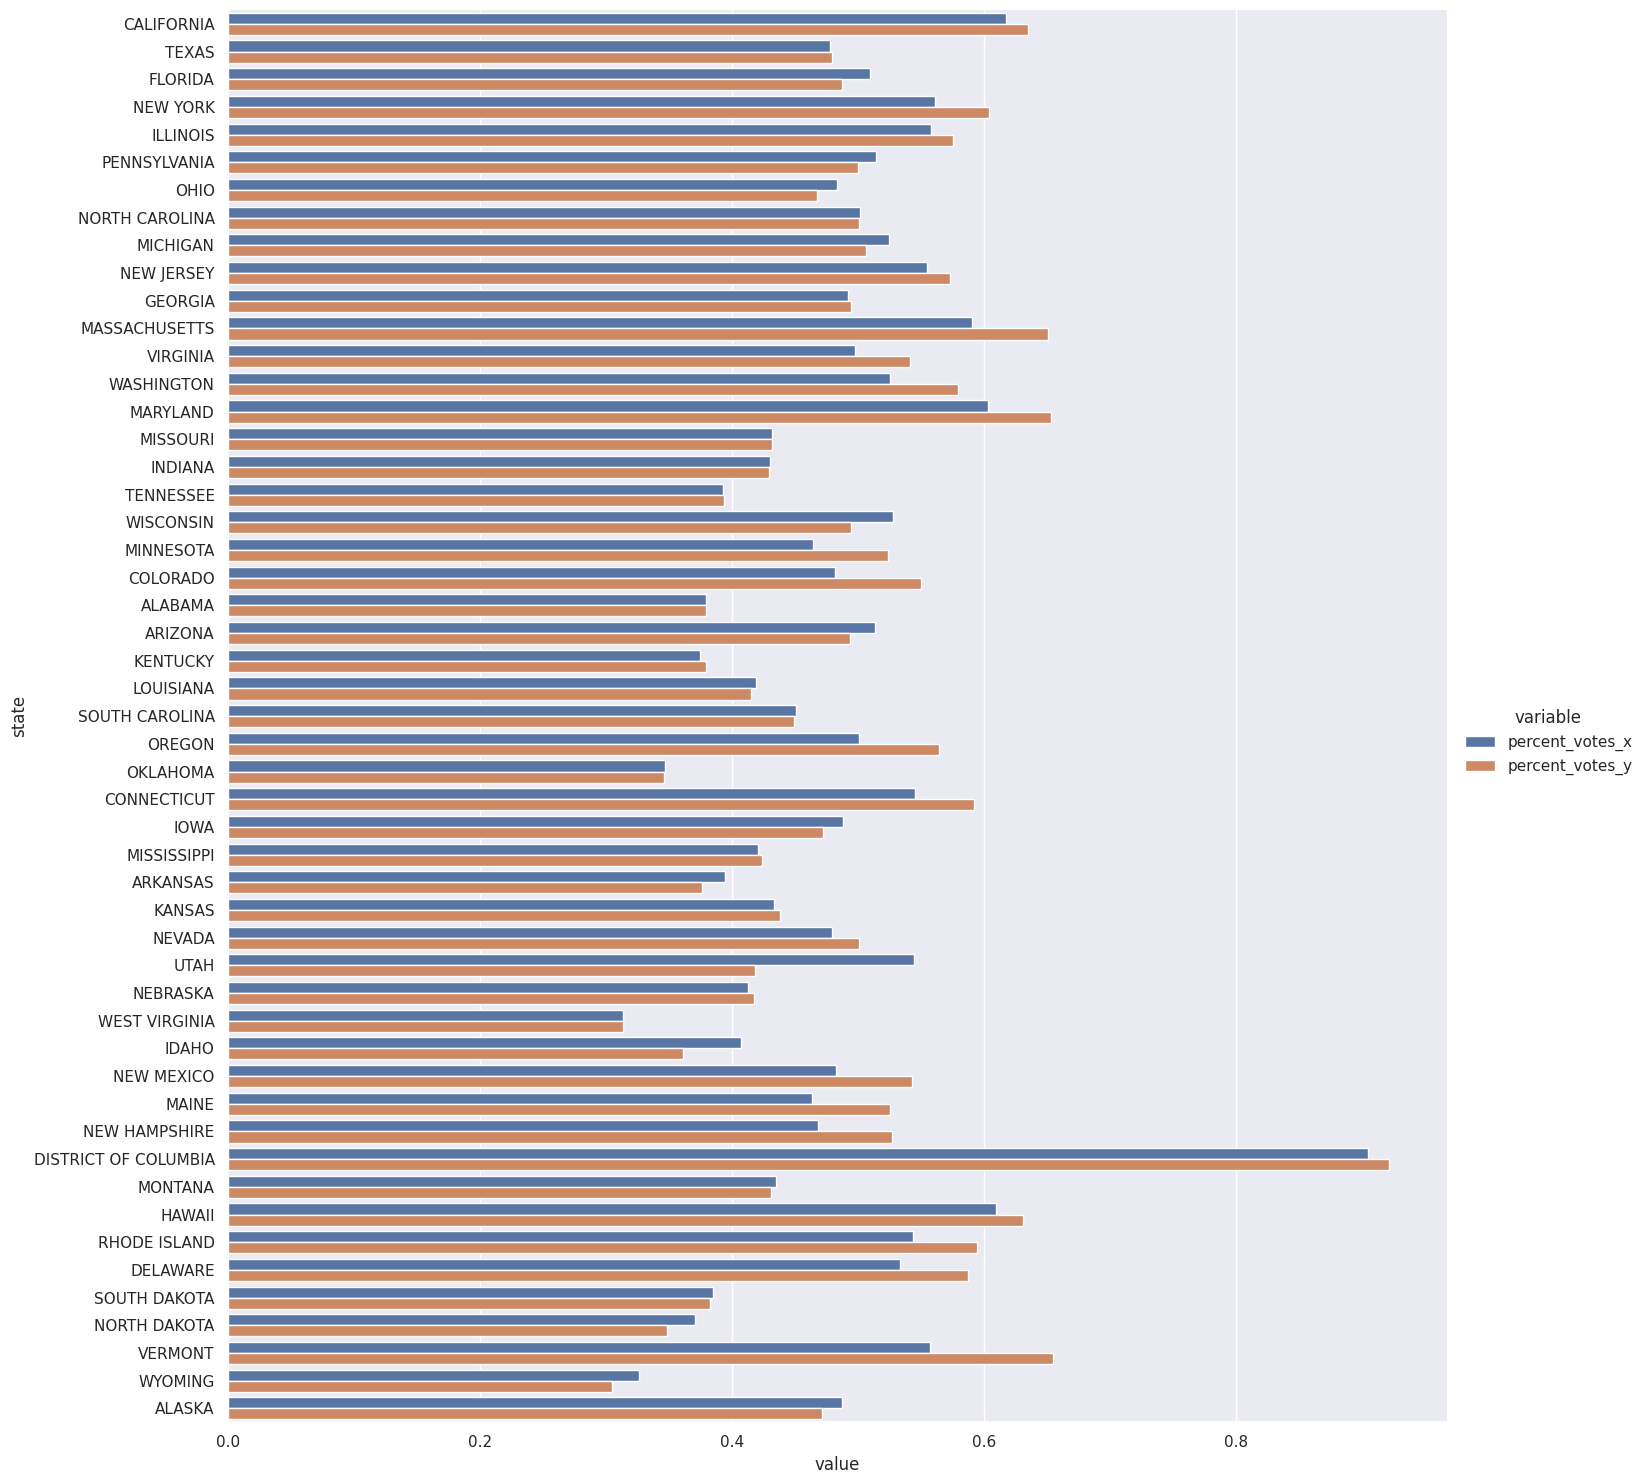

In [21]:
com = pd.melt(combined_elections, id_vars=['state'], value_vars=['percent_votes_x','percent_votes_y'])
sns.catplot(data= com, y='state', x='value', hue='variable', kind='bar', height= 15)